In [1]:
#This is a new notebook for use with real data. We totally won't try to divide by zero this time.

In [2]:
import batman
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


In [3]:
def chisqa (data, model):
    chi = 0
    
    for i in range(len(data)):
        num = (data[i]-model[i])**2
        denom = model[i]
        summ = num/denom
        chi = chi + summ
    chisum = np.sum(chi)
    return chisum
    

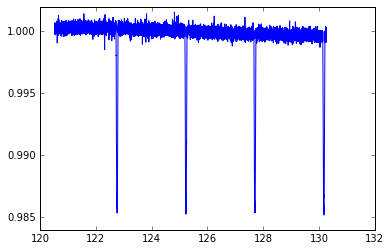

In [4]:
import astropy.io.ascii
table = astropy.io.ascii.read('kepler1b.txt')
time = table['time']
flux = table['flux']
nflux = flux/np.median(flux)
uncertainty = table['uncertainty']
plt.plot(time, nflux)



In [5]:
params = batman.TransitParams()
params.t0 = 0.0                      #time of inferior conjunction
params.per = 2.47061317              #orbital period
params.rp = 0.1281                   #planet radius (in units of stellar radii)
params.a = 7.903                     #semi-major axis (in units of stellar radii)
params.inc = 83.872                  #orbital inclination (in degrees)
params.ecc = 0.0                     #eccentricity
params.w = 0.0                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients
params.limb_dark = "quadratic"       #limb darkening model


plotting = False


t00 = np.arange(-.8, -0.7, 0.001)
chiSq = np.array([])
for i in t00:

    # set the model t0 to one value of t00
    params.t0 = i
    m = batman.TransitModel(params, time)
    modelflux = m.light_curve(params)
    chiSq = np.append(chiSq, chisqa(nflux, modelflux))

    if plotting:
        plt.plot(time, modelflux, color='orange', linewidth=3)
        plt.scatter(time, nflux)
        plt.title("t0 = {}, chi^2 = {}".format(i, chiSq[-1]))
        plt.show()
#plt.scatter(t00, chiSq)
mint00 = t00[np.argmin(chiSq)]
print chiSq
#plt.title("Mininum t00 = {}".format(mint00))



[ 0.06666417  0.06415853  0.06162956  0.05908018  0.05651547  0.05393816
  0.0513529   0.04876179  0.04616929  0.0435791   0.04099612  0.03842453
  0.03587083  0.03334145  0.03084372  0.02838619  0.02597661  0.02362419
  0.02133843  0.01912973  0.01700802  0.01498519  0.01307203  0.01128025
  0.00962059  0.00810445  0.00674209  0.00554467  0.0045219   0.00368379
  0.00303916  0.00259466  0.00235476  0.00232275  0.00249899  0.00288115
  0.00346481  0.00424318  0.00520875  0.00635308  0.00766699  0.00913932
  0.01075909  0.01251529  0.01439721  0.01639272  0.01848994  0.02067621
  0.02294065  0.02527313  0.02766356  0.03010254  0.03258112  0.03509167
  0.03762615  0.04017887  0.0427431   0.0453151   0.04788933  0.050463
  0.05303135  0.05559181  0.05814087  0.06067549  0.06319163  0.06568592
  0.0681543   0.07059209  0.07299567  0.07535964  0.07768126  0.07995166
  0.08216702  0.08432193  0.0864121   0.08843143  0.09037549  0.09223875
  0.09401656  0.09570363  0.09729534  0.09878769  0.1

In [6]:
rp0 = np.arange(0.1, 1.8, 0.01)
chiSq2 = np.array([])

for j in rp0:
    params.rp = j
    m = batman.TransitModel(params, time)
    modelflux2 = m.light_curve(params)
    chiSq2 = np.append(chiSq2, chisqa(nflux, modelflux2))
print chiSq2

[  7.21114782e-02   8.21374405e-02   9.50341157e-02   1.11199709e-01
   1.30992180e-01   1.54692635e-01   1.82332359e-01   2.14015802e-01
   2.50386369e-01   2.91973640e-01   3.39303841e-01   3.92921559e-01
   4.53395408e-01   5.21321616e-01   5.97325161e-01   6.82061352e-01
   7.76217214e-01   8.80511885e-01   9.95697666e-01   1.12256156e+00
   1.26192578e+00   1.41464840e+00   1.58162461e+00   1.76378790e+00
   1.96211057e+00   2.17760512e+00   2.41132560e+00   2.66436873e+00
   2.93787427e+00   3.23302769e+00   3.55106038e+00   3.89325085e+00
   4.26092637e+00   4.65546517e+00   5.07829677e+00   5.53090435e+00
   6.01482551e+00   6.53165500e+00   7.08304569e+00   7.67071095e+00
   8.29642641e+00   8.96203128e+00   9.66943069e+00   1.04205976e+01
   1.12175769e+01   1.20624853e+01   1.29575159e+01   1.39049400e+01
   1.49071095e+01   1.59664599e+01   1.70855140e+01   1.82668843e+01
   1.95132765e+01   2.08274939e+01   2.22124396e+01   2.36711208e+01
   2.52066539e+01   2.68222677e+01

In [106]:
t00 = np.arange(-.8, -.7, 0.001)
chiSq = np.array([])
rp0 = np.arange(0.01, 0.2, 0.01)

chichi = np.zeros([len(t00), len(rp0)])

for i in range(len(t00)):
    thist = t00[i]
    
    # set the model t0 to one value of t00
    params.t0 = thist
    m = batman.TransitModel(params, time)
    modelflux = m.light_curve(params)
    chiSq = np.append(chiSq, chisqa(nflux, modelflux))
    chiSq2 = np.array([])
    for j in range(len(rp0)):
        print i, j
        thisrp = rp0[j]
        params.rp = thisrp
        m = batman.TransitModel(params, time)
        modelflux2 = m.light_curve(params)
        chichi[i,j] =  chisqa(nflux, modelflux2)

#print chiSq
#print chiSq2
#print chichi


0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
8 11
8 12
8 13
8 14
8 15
8 16
8 17
8 18
9 0
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
9 11
9 12
9 13
9 14
9 15
9 16
9 17
9 18
10 0
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
10 11
10 12
10 13
10 14
10 15
10 16
10 17
10 18
11 0
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
1

(101, 19)

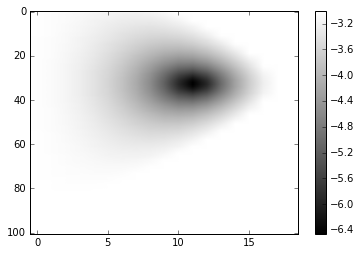

In [107]:

plt.imshow(np.log(chichi), cmap='gray', vmax = -2.999, aspect = 'auto')

plt.colorbar()
chichi.shape

In [102]:

row, column = np.unravel_index([np.argmin(chichi)], np.shape(chichi))
tbest = t00[row]
rbest = rp0[column]


(122.6, 122.8)

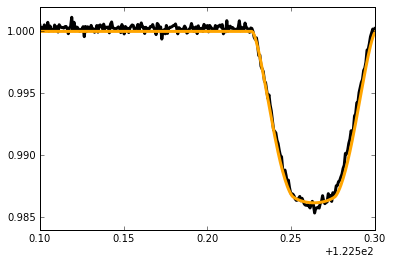

In [103]:
params = batman.TransitParams()
params.t0 = tbest                      #time of inferior conjunction
params.per = 2.47061317              #orbital period
params.rp = rbest                  #planet radius (in units of stellar radii)
params.a = 7.903                     #semi-major axis (in units of stellar radii)
params.inc = 83.872                  #orbital inclination (in degrees)
params.ecc = 0.0                     #eccentricity
params.w = 0.0                       #longitude of periastron (in degrees)
params.u = [0.1, 0.3]                #limb darkening coefficients
params.limb_dark = "quadratic"

model = m.light_curve(params)

plt.plot(time, nflux, color='black', linewidth=3)
plt.plot(time, model, color='orange', linewidth=3)
plt.xlim(122.6, 122.8)


In [65]:
per00 = np.arange(2, 6, 0.1)
chiSq = np.array([])
rp0 = np.arange(0.01, 0.2, 0.001)

chichi2 = np.zeros([len(t00), len(rp0)])

for i in range(len(per00)):
    thisp = per00[i]
    
    # set the model t0 to one value of t00
    params.per = thist
    m = batman.TransitModel(params, time)
    modelflux = m.light_curve(params)
    chiSq = np.append(chiSq, chisqa(nflux, modelflux))
    chiSq2 = np.array([])
    for j in range(len(rp0)):
        print i, j
        thisrp = rp0[j]
        params.rp = thisrp
        m = batman.TransitModel(params, time)
        modelflux2 = m.light_curve(params)
        chichi2[i,j] =  chisqa(nflux, modelflux2)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


IndexError: index 11 is out of bounds for axis 0 with size 11

(11, 190)

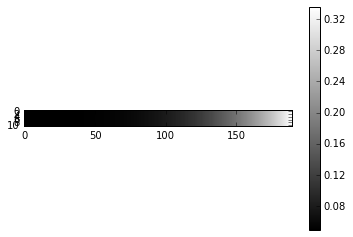

In [83]:

plt.imshow(chichi2, cmap='gray', aspect='equal')#, extent=????)
plt.colorbar()
chichi.shape